In [3]:
import PKA_Sleep as PKA
import numpy as np
#These are all of the parameters needed to build the FLPExp Class
BaseName_all = ["20220219_1610_SW_002",
    "20220314_1610_SW_003",
    "20220328_1610_SW_005"
    ];

acq_range_all = [[11,12,13,14,15,16,17,18,19,20,21,22,23],
                 [10,11,12,13,14,15,16,17,18,19,20,21,22],
                 [10,11,12,13,14,15,16,17,18,19,20,21,22]
                ]

# filename = '/Volumes/PcSSDA/1610/20220219_1610_SW_002/concat_Acq11_22.mat' #concatenated or single acquisition MATLAB photometry data file
epoch_len = 4 #Sleep score eppoch length
one_acq = False #boolean value indicating whether your filename refers to a single acquisition or multiple
fs = 1 #Sampling rate for photometry data (CHANGE TO .25 IF MATLAB FILE IS BINNED)
filter_bounds = [None, None] #Filtering parameters for photometry data; first position is lower bound, second position is upper bound, None means no bound on that side; [None,None] 
shuffle_window = 400 #bin size of shuffled data segments
experimental_sensor = 'ACh3.0' #label for experimental sensor
sleep_states = True #Whether you have/want to include analysis related to sleep
microarousals = False #Whether you want to retroactively change awake states <16s to microarousal (5)

In [5]:
import os
import inspect
import glob

i = 0
acq_range = acq_range_all[i];
print(BaseName_all[i])
filename = "/Volumes/PcSSDA/1610/" + BaseName_all[i] + "/concat_Acq" + str(acq_range[0]) + "_" + str(acq_range[-1]) + ".mat"
print(filename)

rawdatdir_test = os.path.dirname(filename)
print(rawdatdir_test)

state_files = glob.glob(os.path.join(rawdatdir_test, '*extracted_data*', 'StatesAcq*_hr0.npy'))
print(state_files)

20220219_1610_SW_002
/Volumes/PcSSDA/1610/20220219_1610_SW_002/concat_Acq11_23.mat
/Volumes/PcSSDA/1610/20220219_1610_SW_002
['/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq11_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq12_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq13_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq14_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq15_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq16_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq17_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq18_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq19_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq20_hr0.npy', '/Volumes/PcSSDA/1610/20220219_1610_SW_002/extracted_data/StatesAcq21_hr0.

In [6]:
#This line builds the FLPExp Class
i = 0
acq_range = acq_range_all[i];
print(BaseName_all[i])
filename = "/Volumes/PcSSDA/1610/" + BaseName_all[i] + "/concat_Acq" + str(acq_range[0]) + "_" + str(acq_range[-1]) + ".mat"
print(filename)
Exp1 = PKA.FLiPExperiment(filename, epoch_len = epoch_len, 
                        one_acq = one_acq, fs = fs, filter_bounds = filter_bounds, 
                        shuffle_window = shuffle_window, 
                            experimental_sensor = experimental_sensor, 
                            sleep_states = sleep_states, microarousals = microarousals)

20220219_1610_SW_002
/Volumes/PcSSDA/1610/20220219_1610_SW_002/concat_Acq11_23.mat
You didnt put any filter values


In [52]:
a = np.where(Exp1.ZeitTime>15)
b = Exp1.ZeitTime
c = b[a]
d = Exp1.Time[a[0][0]]
print(type(a))
print(a[0][0])
print(c)
print(d)


<class 'tuple'>
13593
[15.00002444 15.00031361 15.00060222 ... 23.99936028 23.99964889
 23.99993806]
13992.088


In [62]:
a = [0,1,2,3,4,5]
a =  np.array(a)
print(np.where((a<5) & (a>-1)))

(array([0, 1, 2, 3, 4]),)


In [9]:
from datetime import datetime
datetime.strptime(Exp1.Timestamps)

['18:06:48', '19:06:52', '20:06:55', '21:06:59', '22:07:02', '23:07:05', '00:07:09', '01:07:09', '02:07:14', '03:07:17', '04:07:20', '05:07:24', '06:07:27']


In [53]:
print(Exp1.Time)

[1.0010000e+00 2.1610000e+00 3.1800000e+00 ... 4.6801877e+04 4.6802937e+04
 4.6804176e+04]


In [55]:
print(len(Exp1.Shuff))

45462


In [37]:
print(Exp1.SSTime[-1])

46796


In [42]:
a = [1,2,3,4,5]
a[-1]

5

<function matplotlib.pyplot.show(close=None, block=None)>

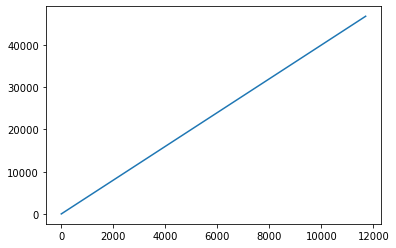

In [36]:
import matplotlib.pyplot as plt
plt.plot(Exp1.SSTime)
plt.show

In [3]:
print(Exp1.Sensor)
print(Exp1.filename)
print(Exp1.rawdatdir)
print(Exp1.ZeitTime)
print(Exp1.GaussianWidth)
print(Exp1.ChiSquare)
print(Exp1.DeltaPeakTime)
print(Exp1.PhotonCount) #Intensity Data
print(Exp1.Lifetime)
print(Exp1.Time)
print(Exp1.Timestamps)
print(Exp1.Filt)
print(Exp1.EpochLength)

print(Exp1.SleepStates)
print(Exp1.SSTime)
print(Exp1.Shuff)

ACh3.0
/Volumes/PcSSDA/1610/20220314_1610_SW_003/concat_Acq10_22.mat
/Volumes/PcSSDA/1610/20220314_1610_SW_003
[11.1738925  11.17422028 11.17450389 ...  0.17419833  0.17448694
  0.17477972]
[0.15184088 0.15184088 0.15184088 ... 0.15184088 0.15184088 0.15184088]
[1.88255559 1.95224281 2.60098504 ... 1.95618398 2.19376586 1.79038785]
[1.91654378 1.91654378 1.91654378 ... 1.91654378 1.91654378 1.91654378]
[272503 272571 275124 ... 219625 220150 220680]
[4.18725514 4.18502513 4.19161983 ... 4.18159757 4.19830288 4.17895864]
[1.0130000e+00 2.1930000e+00 3.2140000e+00 ... 4.6802114e+04 4.6803153e+04
 4.6804207e+04]
['18:10:25', '19:10:29', '20:10:33', '21:10:36', '22:10:40', '23:10:44', '00:10:48', '01:10:52', '02:10:56', '03:11:00', '04:11:04', '05:11:08', '06:11:12', '07:11:15', '08:11:19', '09:11:23']
[4.18725514 4.18502513 4.19161983 ... 4.18159757 4.19830288 4.17895864]
4
[1. 1. 1. ... 2. 2. 2.]
[    0     4     8 ... 46788 46792 46796]
[4.20857353 4.23208618 4.23729792 ... 4.18159757 4

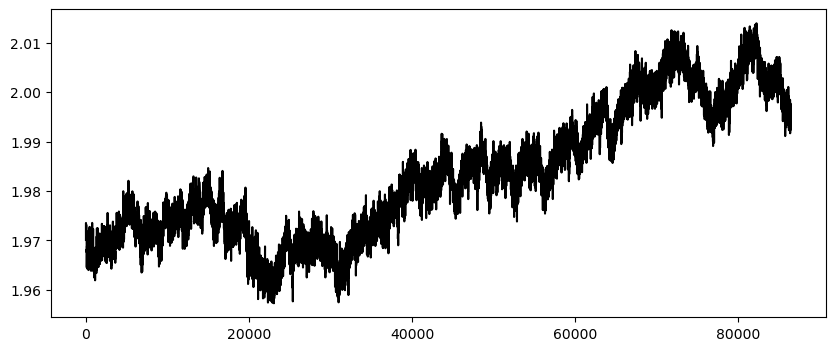

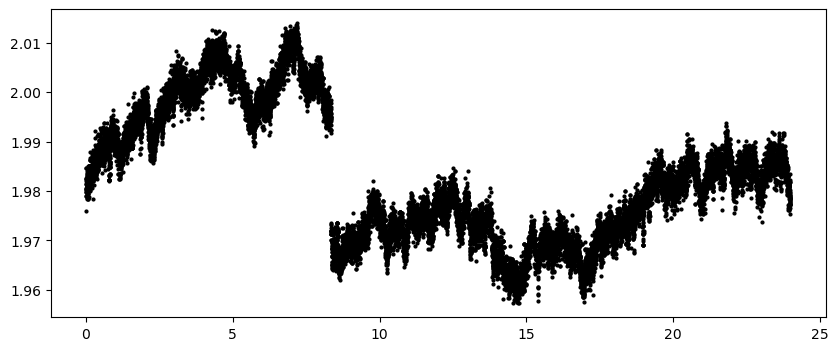

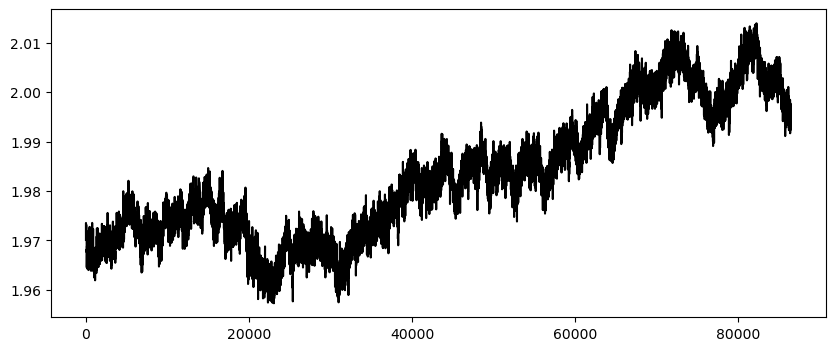

In [4]:
#Plot filtered lifetime over the course of the whole experiment
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize = [10,4])
ax1.plot(Exp1.Time, Exp1.Filt, color = 'k')
#Plot filtered lifetime over the course of the whole experiment with reference to Zeitgeiber Time
fig2, ax2 = plt.subplots(figsize = [10,4])
ax2.scatter(Exp1.ZeitTime, Exp1.Filt, color = 'k', s = 4)
#Plot raw lifetime over the course of the whole experiment
fig3, ax3 = plt.subplots(figsize = [10,4])
ax3.plot(Exp1.Time, Exp1.Lifetime, color = 'k')


In [47]:
#Finding PKAtransients

#thresholding for trangenic animals 
#If you use this, change discrete_cutoff to False
num_std = False #3
FWHM_thresh = False #6.7
#thresholding for virally injected animals
discrete_cutoff = 0.01 #If you use this, turn above values to False
shuffled = False #Are you including shuffling analysis

transient_dict = Exp1.find_transients(num_std = num_std, FWHM_thresh = FWHM_thresh, 
                    shuffled = shuffled, 
                    discrete_cutoff = discrete_cutoff)
print(transient_dict)
#transient_dict['FLIM-AKAR']['Data'] = filtered photometry data
#transient_dict['FLIM-AKAR']['Transient Idx'] = indicies of all transients
number_of_transients = len(transient_dict['FLIM-AKAR']['Transient Idx'])

{'FLIM-AKAR': {'Data': array([-0.00010592,  0.00302966,  0.00299817, ...,  0.01080526,
        0.0037314 ,  0.0049914 ]), 'Transient Idx': [[1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182], [1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324], [1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480], [1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576], [1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739], [1743, 1744, 174

Text(0, 0.5, 'Lifetime (ns)')

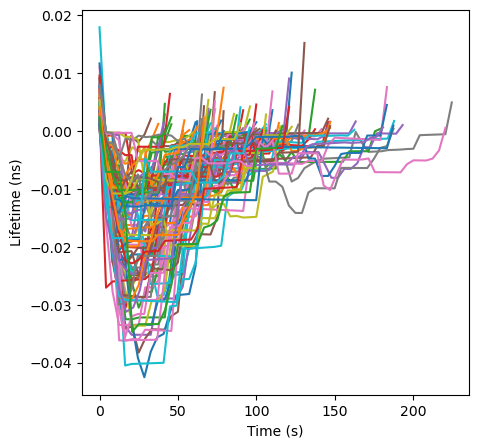

In [42]:
#Plotting all of the transients overlayed
fig3, ax3 = plt.subplots(figsize = [5,5])
for transient in transient_dict['FLIM-AKAR']['Transient Idx']:
    time = Exp1.Time[transient]-Exp1.Time[transient][0]
    ax3.plot(time, Exp1.Filt[transient])
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Lifetime (ns)')

In [48]:
#Finding type of transition associated with each transient
#Need to run find_transient first
microarousals = True
transient_dict2 = transient_dict[Exp1.Sensor] #Change this to transient_dict['Shuffled'] if you're looking at Shuffled Data
transition_types, distance_from_transition = Exp1.ss_transition_per_transient(transient_dict2,
                            microarousals = microarousals)

In [50]:
print(transition_types) #closest transition to each transient
print(distance_from_transition) #distance in seconds from start of transient to transition

[[2. 1.]
 [3. 5.]
 [2. 1.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [3. 1.]
 [3. 1.]
 [2. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [2. 1.]
 [2. 1.]
 [3. 1.]
 [3. 1.]
 [5. 2.]
 [2. 1.]
 [2. 1.]
 [5. 2.]
 [1. 2.]
 [5. 2.]
 [3. 1.]
 [3. 1.]
 [2. 1.]
 [3. 1.]
 [1. 2.]
 [1. 2.]
 [2. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [1. 2.]
 [5. 2.]
 [5. 2.]
 [2. 1.]
 [2. 1.]
 [1. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [1. 2.]
 [5. 2.]
 [2. 3.]
 [1. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [2. 1.]
 [2. 1.]
 [1. 2.]
 [2. 1.]
 [1. 2.]
 [5. 2.]
 [5. 2.]
 [1. 2.]
 [5. 2.]
 [1. 2.]
 [5. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 5.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [2. 5.]
 [1. 2.]
 [1. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [5. 2.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [5. 2.]
 [2. 5.]
 [5. 2.]
 [5. 2.]
 [1. 2.]]
[1.5297000e+01 5.3639980e+03 1.9298000e+01 6.3287970e+03 7.0360780e+03
 7.1734980e+03 1.8648000e+01 1.9408800e+02 1.1423090e+04 1.8791000e+01
 1.2487100e+02 1.456

In [56]:
#Finding time in seconds when each transition happens
timestamps_dict = Exp1.transition_timestamps(microarousals = True)
print(timestamps_dict['Timestamps']['NREM-Wake']) #time from start of the experiment that each NREM-Wake transition happened
print(timestamps_dict['Number']['NREM-Wake']) #number of NREM-Wake transitions

[ 4728  5976 11420 27452 31060 35780 37988 41388 42476 42908 43104 45512
 49692 52200 53072 54332 58080 59012 59064 59160 59356 59468 63468 64336
 65332 66080 67432 69060 69196 76608 76744 82456 85028]
33


In [59]:
#To find amplitude of all transients
#Build a class AND run find_transients before using this (see above)
lifetime = Exp1.Lifetime
transient_idxs = transient_dict['FLIM-AKAR']['Transient Idx']
amplitudes, start_vals, troughs = PKA.transient_amplitudes(lifetime, 
                                                           transient_idxs)
print(amplitudes) #amplitude for each transient
print(start_vals) #first lifetime value in transient
print(troughs) #lowest lifetime value in each transient
#amplitudes = start_vals-troughs

[0.02667727058653946, 0.0185749705681999, 0.03656729819195048, 0.029166171120487805, 0.021018591505752582, 0.019048159331493952, 0.036481354465339066, 0.018720136472928584, 0.032157054488967995, 0.04717533114954908, 0.009813851841214083, 0.01192025773120653, 0.036007693940201424, 0.03725757211142966, 0.03996146266607581, 0.04361392428576516, 0.020773167764929656, 0.03491164873884056, 0.01664347406306388, 0.01813424721598511, 0.03711229661406934, 0.025253360258544966, 0.041169302089934856, 0.014111040658671747, 0.023721025546621144, 0.03008549717345277, 0.04315767314285712, 0.026816146067860425, 0.035151992102101515, 0.03753408994610208, 0.02032708220048729, 0.025970776971984355, 0.014955926667806985, 0.018738372462321573, 0.02270125758492214, 0.021647640380914268, 0.02801214058062751, 0.035836851584318374, 0.016140772582105223, 0.028127906261401936, 0.057126522844702654, 0.019813206600546307, 0.011213452375485211, 0.014387592167166341, 0.017657947390646855, 0.011616603793958014, 0.0385

4739.297

array([4.7530000e+00, 8.8340000e+00, 1.2913000e+01, ..., 8.2809551e+04,
       8.2813712e+04, 8.2814872e+04])